# study03-1で生成したcsvファイルを読み込み、グラフ化する。
  - csvファイルをDataFrameに読みこむ。
  - ***Yearフィールドがあり値が重複している。groupbyで年毎にまとめる。その際、他のフィールドは平均値としておく。

---
## 1.  csvファイルを読み込む

In [1]:
import numpy as np
import glob
import pandas as pd
csv_JH = '.\\Data\\03_Sample\\JH.csv'

In [2]:
#ファイルを読み込み
df_JH = pd.read_csv(csv_JH, encoding='Shift_JISx0213')
display(df_JH.head(8))

,Region,Year,Koku,Su
0,1,2007,81.683626,71.984765
1,2,2007,82.510161,73.106976
2,3,2007,81.752606,71.858818
3,4,2007,81.429095,71.106606
4,1,2008,73.745387,63.687490
5,2,2008,73.959331,64.141464
6,3,2008,73.672881,62.998008
7,4,2008,73.423445,61.742351


---
## 2. Yearフィールドでグループ化し、平均値を求める。

In [16]:
df_JH_grp = df_JH.groupby(['Year']).mean()

---
## 3. 棒グラフ

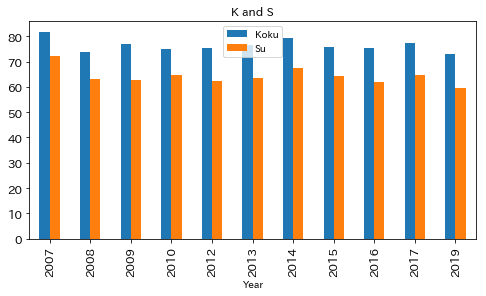

In [18]:
df_JH_grp[['Koku','Su']].plot(kind='bar', stacked=False,  title = "K and S", figsize=(8, 4), fontsize=12)

---
## 4. 散布図行列

<class 'seaborn.axisgrid.PairGrid'>


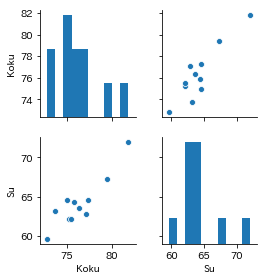

In [19]:
import seaborn as sns
pg = sns.pairplot(df_JH_grp[['Koku','Su']], height=2)
print(type(pg))

---
## 5. 相関係数

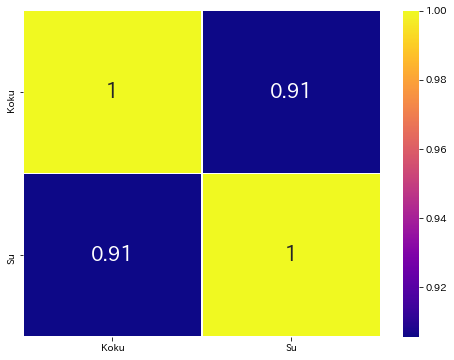

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(df_JH_grp[['Koku','Su']].corr(), annot=True, annot_kws={"size": 20}, cmap='plasma', linewidths=.5) 